### importing necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import plotly.graph_objs as go
from plotly.graph_objs import Figure, Data
import cufflinks as cf
cf.go_offline()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

#### reading iris dataset csv file

In [2]:
dataset = pd.read_csv('IRIS.csv')

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### removing species column

In [4]:
dataset.dropna(inplace=True)
dataset.drop('species', axis = 1 , inplace=True)

In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### plotting all the features in a histogram

In [46]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dataset['sepal_length'], name='sepal_length'))
fig.add_trace(go.Histogram(x=dataset['sepal_width'], name='sepal_width'))
fig.add_trace(go.Histogram(x=dataset['petal_length'], name='petal_length'))
fig.add_trace(go.Histogram(x=dataset['petal_width'], name='petal_width'))

# Overlay histograms
fig.layout.update(barmode='overlay')
# Reduce opacity to see histograms
fig.update_traces(opacity=0.75)
fig.show()

##### standardizing the dataset to bring down into same scale

In [6]:
sd = StandardScaler()

In [7]:
scaled_data = sd.fit_transform(dataset)

In [8]:
dataset = pd.DataFrame(scaled_data, columns=dataset.columns)

In [9]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [10]:
df = dataset.copy(deep=True)

#### using pca method to decompose the dimensions

In [11]:
pca = PCA()

In [12]:
decomposed_data = pca.fit_transform(dataset)

#### we can calculate the explained variance for each attribute by using scikit-learn, and plot the result

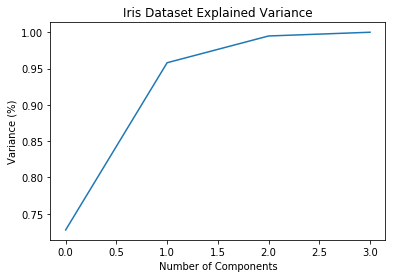

In [13]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Iris Dataset Explained Variance')
plt.show()

This plot tells us that selecting 2 components we can preserve something around 98.8% or 99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

In [14]:
pca = PCA(n_components=2)

In [15]:
decomposed_data = pca.fit_transform(dataset)

In [16]:
columns = ['component#%i' % i for i in range(2)]

In [17]:
decomposed_df = pd.DataFrame(decomposed_data, columns=columns)

In [18]:
decomposed_df.head()

,component#0,component#1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [19]:
# fig = go.Figure(data=go.Scatter(x=decomposed_df['component#0'], y=decomposed_df['component#1'], mode='markers'))

# Create a trace
trace = go.Scatter(
    x = decomposed_df['component#0'],
    y = decomposed_df['component#1'],
    mode = 'markers',
    marker=dict(
        size=16,
        color=np.random.randn(500), #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
)
layout = {
    "title": "Scatter plot",
    "xaxis": {
        "showgrid": True,
        "zeroline": False,
        "showticklabels": False
    },
    "yaxis": {
        "showgrid": True,
        "zeroline": False,
        "showticklabels": False
    },
    "legend": {"font": {"size": 16}},
    "titlefont": {"size": 24}
}
data = [trace]
fig = Figure(data=data, layout=layout)
fig.show()

In [20]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

#### Using elbow method to compute the clusters

In [21]:
wcss = []
clusters = []
d = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10,
                    max_iter=300)
    kmeans.fit_predict(dataset)
    wcss.append(kmeans.inertia_)
    clusters.append(k)

#### using plotly method to plot elbow curve

In [22]:
data = {
                "type": "scatter",
                "x": clusters,
                "y": wcss
            }

data = Data([data])
layout = go.Layout(
    title="Computing WCSS for KMeans++",
    yaxis=dict(title='Sum of squared errors'),
    xaxis=dict(title='Number of clusters'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = Figure(data=data, layout=layout)
fig.show()

/home/winjit/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




as per above graph 5 clusters seems good to proceed further

In [23]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10,
                    max_iter=300)

In [24]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.fit(decomposed_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.labels_

array([1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 2, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 0,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 2, 4, 2, 4, 2, 2, 0, 2, 4, 2,
       2, 4, 2, 0, 4, 2, 4, 2, 2, 0, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4], dtype=int32)

#### adding cluters into original dataframe

In [27]:
dataset.insert(loc=0, column='clusters', value=pd.Series(kmeans.labels_).astype(int))

In [28]:
dataset.head(10)

,clusters,sepal_length,sepal_width,petal_length,petal_width
0,1,-0.900681,1.032057,-1.341272,-1.312977
1,3,-1.143017,-0.124958,-1.341272,-1.312977
2,3,-1.385353,0.337848,-1.398138,-1.312977
3,3,-1.506521,0.106445,-1.284407,-1.312977
4,1,-1.021849,1.263460,-1.341272,-1.312977
5,1,-0.537178,1.957669,-1.170675,-1.050031
6,3,-1.506521,0.800654,-1.341272,-1.181504
7,3,-1.021849,0.800654,-1.284407,-1.312977
8,3,-1.748856,-0.356361,-1.341272,-1.312977
9,3,-1.143017,0.106445,-1.284407,-1.444450


#### adding clusters colums to decomposed dataframe for plotting the cluters

In [29]:
decomposed_df.insert(loc=0, column='clusters', value=pd.Series(kmeans.labels_).astype(int))

In [30]:
dataset['clusters'].value_counts()

4    47
2    28
3    27
0    25
1    23
Name: clusters, dtype: int64

* seems clusters1 has max datapoints

In [31]:
kmeans.cluster_centers_

array([[ 0.28048804, -1.32284594],
       [-2.21453673,  1.08176698],
       [ 2.05721014,  0.85674839],
       [-2.22501183, -0.38034813],
       [ 0.98713998, -0.11763931]])

#### creating dataframe for centers

In [32]:
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns = decomposed_df.columns[1:])

In [33]:
centroid_df.head()

,component#0,component#1
0,0.280488,-1.322846
1,-2.214537,1.081767
2,2.057210,0.856748
3,-2.225012,-0.380348
4,0.987140,-0.117639


In [34]:
dataset.head()

,clusters,sepal_length,sepal_width,petal_length,petal_width
0,1,-0.900681,1.032057,-1.341272,-1.312977
1,3,-1.143017,-0.124958,-1.341272,-1.312977
2,3,-1.385353,0.337848,-1.398138,-1.312977
3,3,-1.506521,0.106445,-1.284407,-1.312977
4,1,-1.021849,1.263460,-1.341272,-1.312977


In [35]:
decomposed_df.columns

Index(['clusters', 'component#0', 'component#1'], dtype='object')

In [36]:
clusters = decomposed_df['clusters'].unique()

columns = decomposed_df.columns[1:]

symbol = ('circle', 'square', 'triangle-up', 'diamond', 'cross', 'x',
                  'triangle-down', 'asterisk', 'octagon', 'diamond-tall-down')
color = ('yellow','blue',  'magenta', 'green', 'teal', 'navy','peru',
                 'lightslategrey', 'red', 'olive')

plot_data = []

for c in clusters:
    trace1 = {
      "mode": "markers", 
      "name": "cluster"+str(c),
      "type": "scatter", 
      "x": decomposed_df.loc[decomposed_df['clusters']==c][columns[0]], 
      "y": decomposed_df.loc[decomposed_df['clusters']==c][columns[1]],
      "marker": {
        "line": {
          "color": "navy", 
          "width": 0.5
        }, 
        "size": 12, 
        "color": color[c],
        "symbol": symbol[c]
      }
    }
    trace2 = {
      "name": "centroid"+str(c),
      "type": "scatter", 
      "x": [centroid_df[columns[0]][c]], 
      "y": [centroid_df[columns[1]][c]],
      "marker": {
        "color": "rgb(200,10,10)", 
        "symbol": symbol[c]
      }
    }
    plot_data.append(trace1)
    plot_data.append(trace2)
    
data = Data(plot_data)
layout = {
    "title": "K-Means Clustering (k=%s)" % len(clusters),
    "xaxis": {
        "showgrid": True,
        "zeroline": False,
        "showticklabels": False
    },
    "yaxis": {
        "showgrid": True,
        "zeroline": False,
        "showticklabels": False
    },
    "legend": {"font": {"size": 16}},
    "titlefont": {"size": 24}
}
fig = Figure(data=data, layout=layout)
fig.show()

/home/winjit/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


